# Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

,date,holiday,total_power_consumption,temp_mean
0,2011-11-23,0,90.39,8.46
1,2011-11-24,0,213.41,10.12
2,2011-11-25,0,303.99,8.48
3,2011-11-26,0,420.98,12.28
4,2011-11-27,0,444.88,7.42


In [3]:
# skip this line if yours is total_power_consumption
# df = df.rename(columns ={'total power consumption' : 'total_power_consumption'})

In [4]:
# set index and convert index to DateTimeIndex
df.index = df.date
df.index = pd.to_datetime(df.index)
# drop redundant column 
df = df.drop(labels='date', axis=1)

## Compare average power and temperature

In [5]:
average = df.total_power_consumption/5566
df['avg_power_consumption'] = average
df.head()

,holiday,total_power_consumption,temp_mean,avg_power_consumption
date,,,,
2011-11-23,0,90.39,8.46,0.016240
2011-11-24,0,213.41,10.12,0.038342
2011-11-25,0,303.99,8.48,0.054616
2011-11-26,0,420.98,12.28,0.075634
2011-11-27,0,444.88,7.42,0.079928


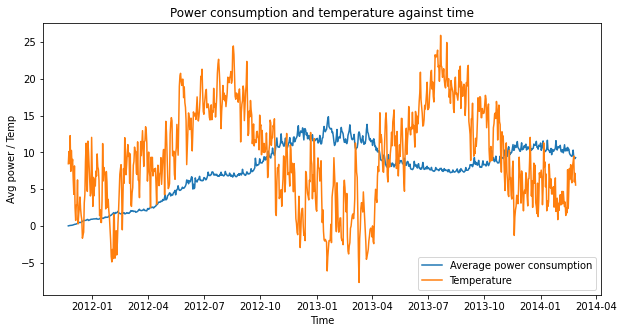

In [17]:
# average power and temperature
plt.figure(figsize=(10,5))
plt.plot(df.avg_power_consumption, label = 'Average power consumption')
plt.plot(df.temp_mean, label = 'Temperature')
plt.ylabel("Avg power / Temp")
plt.xlabel("Time")
plt.title("Power consumption and temperature against time")
plt.legend()
plt.show()

The average power consumption is higher when the temperature is lower.

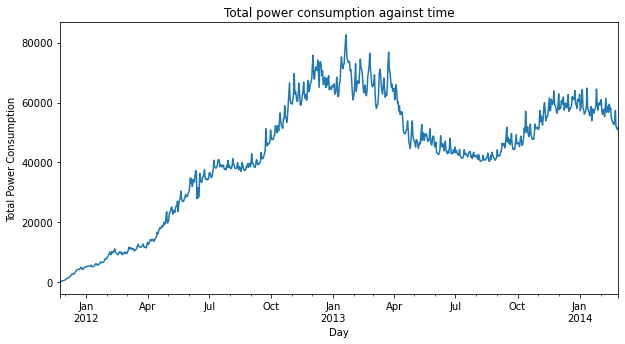

In [7]:
# total power consumption
df.total_power_consumption.plot(figsize=(10,5))
plt.xlabel("Day")
plt.ylabel("Total Power Consumption")
plt.title("Total power consumption against time")
plt.show()

The yearly seasonal pattern is not obvious in the beginning, but after 2012, it is pretty obvious that the power consumption around higher in Jan.

# Decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

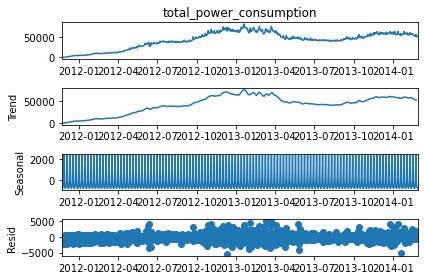

In [9]:
# perform decomposition
result = seasonal_decompose(df.total_power_consumption, model='additive')
result.plot()
plt.show()

From the analysis above, the data consists of very rapid consistent seasonality. 

## A closer look

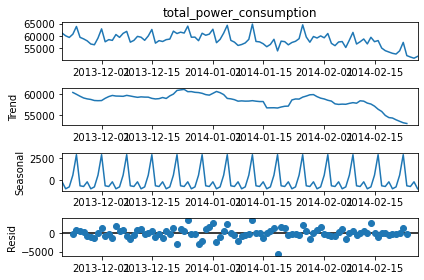

In [10]:
result = seasonal_decompose(df.total_power_consumption[-100:], model='additive')
result.plot()
plt.show()

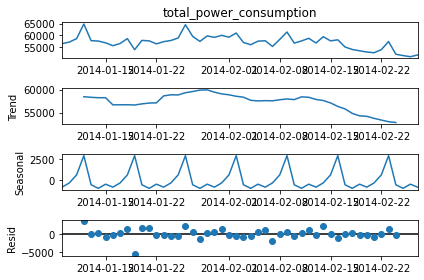

In [11]:
result = seasonal_decompose(df.total_power_consumption[-50:], model='additive')
result.plot()
plt.show()

The seasonal pattern occurs weekly and the data has an additive decomposition.

# Benchmark Model - Naive Model

In [12]:
df['naive'] = df.total_power_consumption.shift(1)

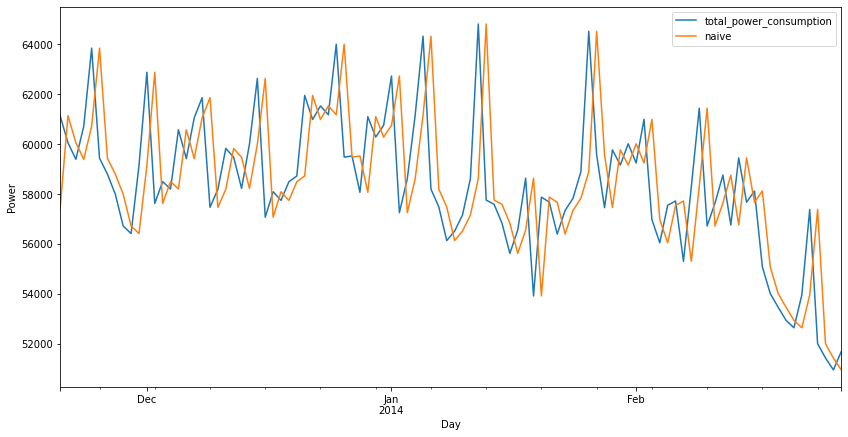

In [13]:
#show test and predicted value
test_n = 100
df[['total_power_consumption', 'naive']].iloc[-test_n:].plot(figsize=(14,7))
plt.ylabel('Power')
plt.xlabel('Day')
plt.show()

In [14]:
#create rmse function
def rmse(predicted_val, true):
    return np.sqrt(np.mean((predicted_val - true)**2))

In [15]:
#rmse loss
naive_train_error = rmse(df.naive[:-test_n], df.total_power_consumption[:-test_n])
naive_test_error = rmse(df.naive[-test_n:], df.total_power_consumption[-test_n:])
print("Naive")
print(f"Training set error: {naive_train_error}, Test set error: {naive_test_error}")

Naive
Training set error: 2053.0694840808055, Test set error: 2590.123326918623
